<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Mini%20Project/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.shape

(37638, 5)

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [6]:
ny_df = df[df['state']=='New York']

In [7]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [8]:
ny_df.shape

683/365.25

#This data spans the previous ≈1.87 years.

1.8699520876112252

In [9]:
ny_df.tail()

#This data would normally display the past few days.

,date,state,fips,cases,deaths
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876


In [10]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [11]:
#total number of cases
ny_df['cases'].max()

4361115

In [12]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

953601238

Finding new covid 19 cases on daily basis (new cases added everyday)

In [13]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previous_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)
print(newcase_count)

62049


In [14]:
## creation of ny_new_deaths
newdeath = []
previous_death = 0
for index, row in ny_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previous_death
  previous_death = current_death
  newdeath.append(newdeath_count)
print(newdeath_count)

238


In [15]:
ny_df.tail(10)

,date,state,fips,cases,deaths
37112,2022-01-04,New York,36,3729331,59339
37168,2022-01-05,New York,36,3804480,59485
37224,2022-01-06,New York,36,3884858,59631
37280,2022-01-07,New York,36,3966952,59827
37336,2022-01-08,New York,36,4057084,59913
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876


In [16]:
ny_df['new_cases'] = newcase
ny_df['new_deaths']= newdeath

C:\Users\stude\AppData\Local\Temp/ipykernel_53068/3577090079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df['new_cases'] = newcase
C:\Users\stude\AppData\Local\Temp/ipykernel_53068/3577090079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df['new_deaths']= newdeath


In [17]:
ny_df['new_cases'].sum()

#This data reveals the cumulative number of infections.


4361115

In [18]:
ny_df['new_deaths'].sum()

#This data reveals the cumulative number of deaths.


60876

In [19]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']
ny_new_deaths = ny_df['new_deaths']

In [20]:
type(ny_new_cases)

pandas.core.series.Series

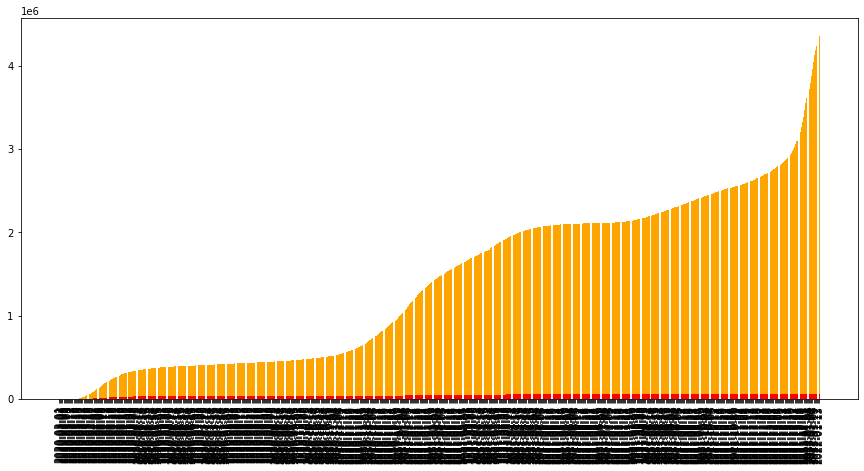

In [21]:
#This data shows death-to-cases over time.
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_cases, color='orange')
plt.bar(x=ny_dates, height=ny_deaths, color='red')
plt.xticks(rotation=90)
plt.show()

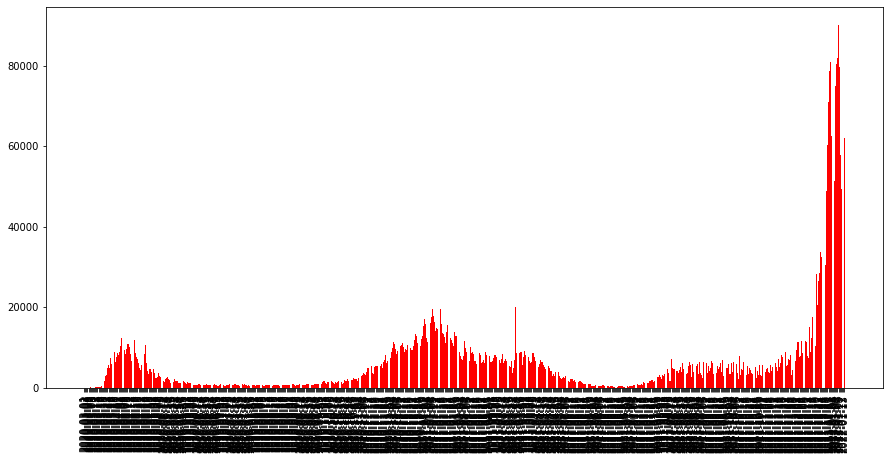

In [22]:
#This data shows new cases over time.
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [23]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]
ny_new_deaths_30 = ny_df['new_deaths'][-31:-1]

In [24]:
# ny_dates_30
# ny_new_cases_30
# ny_deaths_30


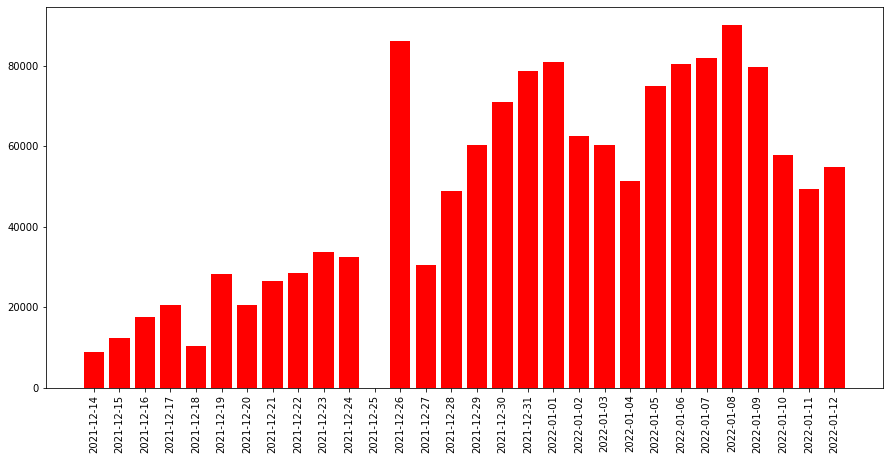

In [25]:
#This data reveals new cases in past 30 days.
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

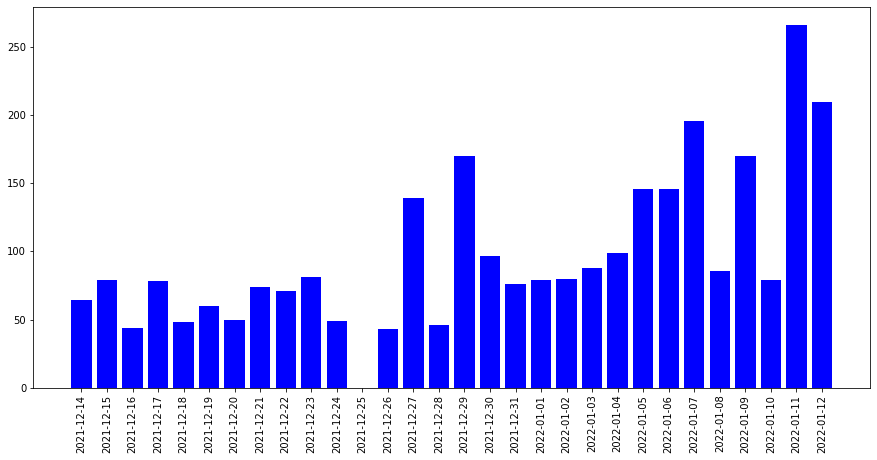

In [26]:
#This data reveal new deaths in past 30 days.
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [27]:
states = ['New York', 'California','Florida', 'Texas','Arizona','New Jersey']

In [28]:
ny_df

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0
...,...,...,...,...,...,...,...
37392,2022-01-09,New York,36,4136861,60083,79777,170
37448,2022-01-10,New York,36,4194745,60162,57884,79
37504,2022-01-11,New York,36,4244155,60428,49410,266
37560,2022-01-12,New York,36,4299066,60638,54911,210


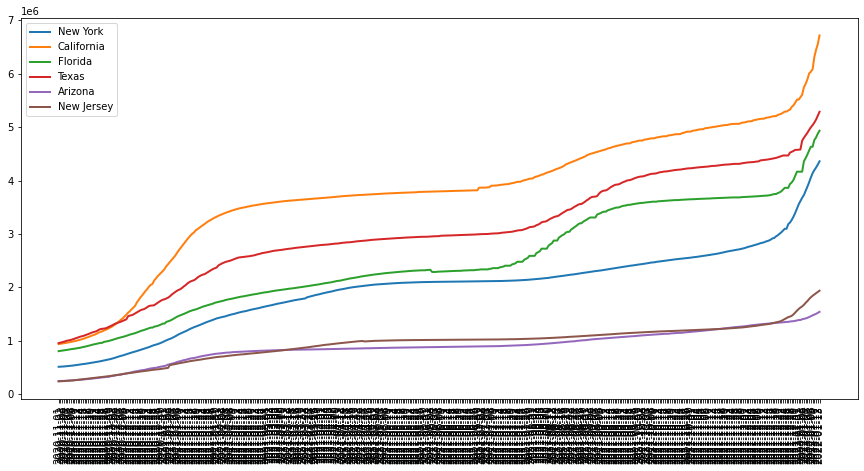

In [29]:
#This data reveals the cumulative number of infections over time for these 5 states.
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Your text here
2.   Conclusion 2
     --Your text here>

